In [1]:
from google.colab import files

uploaded = files.upload()

Saving career_tracks.csv to career_tracks.csv


Epoch 1/10
1/1 [==============================] - 1s 980ms/step - loss: 5.2403 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 12ms/step - loss: 5.2113 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 11ms/step - loss: 5.1809 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 5.1494 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 10ms/step - loss: 5.1166 - accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 10ms/step - loss: 5.0825 - accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 10ms/step - loss: 5.0475 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 5.0100 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 10ms/step - loss: 4.9710 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 11ms/step - loss: 4.9304 - accuracy: 1.0000


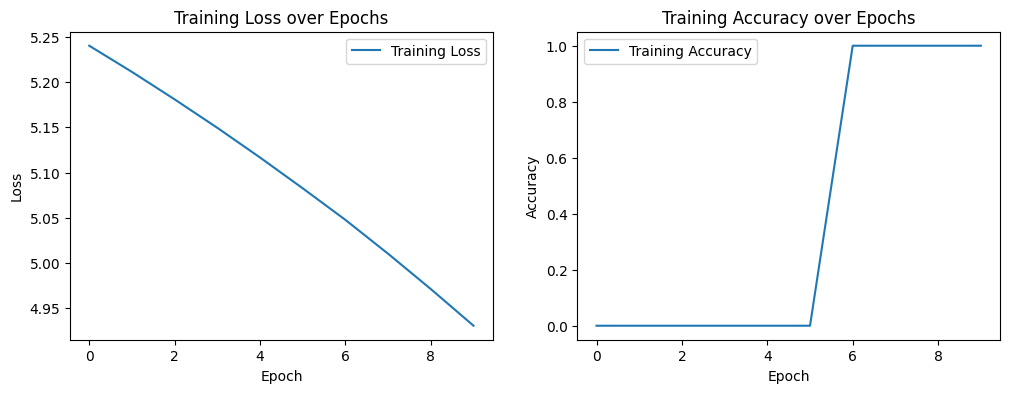

1/1 [==============================] - 0s 115ms/step
Predicted career track: Software Programmer / Architect


In [2]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load and preprocess the data
data = {
    "id": 143,
    "studentId": 220,
    "personalityType": "INTJ",
    "subjectScores": [
        {"subject": "ENGLISH", "score": 39.98},
        {"subject": "GEOGRAPHY", "score": 31.93},
        {"subject": "CIVICS", "score": 13.81},
        {"subject": "HISTORY", "score": 58.87},
        {"subject": "BIOLOGY", "score": 90.56},
        {"subject": "PHYSICS", "score": 23.86},
        {"subject": "CHEMISTRY", "score": 59.23},
        {"subject": "MATHEMATICS", "score": 51.81}
    ],
    "thinkingOrientation": {
        "analyticalIndex": 62.88,
        "technicalIndex": 23.43,
        "creativeIndex": 4.69,
        "peopleOrientation": {
            "CAUTIOUS": 0,
            "INSPIRING": 3,
            "DOMINANT": 2,
            "SUPPORTIVE": 3
        },
        "thinkingOrientationForGrads": "ANALYTICAL",
        "peopleOrientationIndex": 29.18
    }
}

# Extract input features (X)
personality_type = data["personalityType"]
subject_scores = [score["score"] for score in data["subjectScores"]]

# Perform one-hot encoding for personality type
personality_mapping = {"ENTJ": 0, "INTJ": 1, "ENTP": 2, "INTP": 3, "ENFJ": 4, "INFJ": 5, "ENFP": 6, "INFP": 7, "Other": 8}
encoded_personality = personality_mapping.get(personality_type, personality_mapping["Other"])

# Scale subject scores to [0, 1]
subject_scores = [score / 100.0 for score in subject_scores]

# Combine input features
X = [encoded_personality] + subject_scores

# Load career tracks from the CSV file
career_tracks_df = pd.read_csv("career_tracks.csv")
career_tracks = career_tracks_df["Track"].tolist()

# Encode career tracks as integers
career_mapping = {track: i for i, track in enumerate(career_tracks)}

# Example label for the provided input data (replace this with your labels)
y = [career_mapping["Software Programmer / Architect"]]  # Replace with the actual label

# Build the CNN model
model = keras.Sequential([
    layers.Input(shape=(len(X),)),  # Adjust input shape based on your data
    layers.Reshape((len(X), 1)),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(career_tracks), activation='softmax')  # Adjust output units
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Flatten y array
y = np.array(y).flatten()

# Train the model
history = model.fit(np.array([X]), y, epochs=10, batch_size=1)

# Plot the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend()

plt.show()

# Make predictions
predictions = model.predict(np.array([X]))

# Decode the predictions to get career tracks
predicted_career_index = np.argmax(predictions)
predicted_career = career_tracks[predicted_career_index]

print(f'Predicted career track: {predicted_career}')


In [3]:
# Save the trained model to an h5 file
model.save("career_track_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [4]:
# Load the saved model
loaded_model = keras.models.load_model("career_track_model.h5")

# Now you can use the loaded model to make predictions
predictions = loaded_model.predict([X])

# Decode the predictions to get the predicted career track
predicted_career = career_tracks[np.argmax(predictions)]

print(f'Predicted career track: {predicted_career}')

1/1 [==============================] - 0s 103ms/step
Predicted career track: Software Programmer / Architect
